In [51]:
import pandas as pd
import numpy as np
import json
import requests
import matplotlib.pyplot as plt
import bokeh as bk
from bokeh.plotting import figure, show

In [54]:
import os
os.environ['PROJ_LIB'] = r'C:\Users\pgsze\Anaconda3\pkgs\proj4-5.2.0-ha925a31_1\Library\share'

from mpl_toolkits.basemap import Basemap
import tilemapbase


tilemapbase.start_logging()

extent = tilemapbase.Extent.from_lonlat(-74.03,-73.91, 40.65, 40.81)

t = tilemapbase.tiles.Carto_Light

In [2]:
file=open('NYC_traffic_signals.geojson','r')
traffic_signals_json = json.load(file)
file.close()


In [3]:
signal_lats_lons = []
for feat in traffic_signals_json['features']:
    lat_lon = tuple(feat['geometry']['coordinates'])
    signal_lats_lons.append(lat_lon)
x,y = zip(*signal_lats_lons)

In [80]:
print(len(x))

11859


In [10]:
file=open('NYC_stop_signs.geojson','r')
stop_signs_json = json.load(file)
file.close()


In [11]:
stop_lats_lons = []
for feat in stop_signs_json['features']:
    lat_lon = tuple(feat['geometry']['coordinates'])
    stop_lats_lons.append(lat_lon)
s_x,s_y = zip(*stop_lats_lons)

In [12]:
len(stop_signs_json['features'])
len(traffic_signals_json['features'])

11859

In [30]:
p = figure()
p.scatter(x,y,size=2,alpha=.2)
show(p)

In [14]:
int_df=pd.DataFrame(signal_lats_lons,columns=['LAT','LON']).sort_values(by=['LAT','LON']).reset_index().drop('index',axis=1)

In [81]:
#NEXT: Import the crash data and plot on same scatterplot
crash_df = pd.read_csv('../NYPD_Motor_Vehicle_Collisions-June2019.csv')

C:\Users\pgsze\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [82]:
bool_2016 = crash_df['DATE'].map(lambda x: (int(x[-4:]) == 2016))
bool_2017 = crash_df['DATE'].map(lambda x: (int(x[-4:]) == 2017))
bool_2018 = crash_df['DATE'].map(lambda x: (int(x[-4:]) == 2018))
bool_2019 = crash_df['DATE'].map(lambda x: (int(x[-4:]) == 2019))

bike_bool = crash_df['NUMBER OF CYCLIST INJURED']!=0

#bike_bool = (crash_df['VEHICLE TYPE CODE 1'] == 'Bike') | (crash_df['VEHICLE TYPE CODE 2'] == 'Bike') | (crash_df['VEHICLE TYPE CODE 3'] == 'Bike') | (crash_df['VEHICLE TYPE CODE 4'] == 'Bike') | (crash_df['VEHICLE TYPE CODE 5'] == 'Bike')
#lon_bool = (crash_df['LONGITUDE'] < -73.91)&(crash_df['LONGITUDE'] > -74.03)
#lat_bool = (crash_df['LATITUDE']>40.5) & (crash_df['LATITUDE'] < 40.81)

In [93]:
crash_df[bike_bool].sort_values('DATE').head()
len(crash_df[bike_bool])

30663

In [17]:
bike_crash_2018_df = crash_df[bike_bool & bool_2018]

In [18]:
bike_crash_2018_df = bike_crash_2018_df[bike_crash_2018_df['LATITUDE'] != 0.0]

In [19]:
bike_crash_locs = zip(bike_crash_2018_df['LATITUDE'].dropna().values,bike_crash_2018_df['LONGITUDE'].dropna().values)

In [20]:
b_y, b_x = zip(*bike_crash_locs)

In [49]:
#list(zip(b_y,b_x))

In [57]:
crashes = [tilemapbase.project(a,b) for a,b in zip(b_x,b_y)]
b_x_proj, b_y_proj = zip(*crashes)

signals=[tilemapbase.project(a,b) for a,b in zip(x,y)]
x_proj, y_proj = zip(*signals)

In [66]:
#extent = tilemapbase.Extent.from_lonlat(-74.03,-73.91, 40.65, 40.81)


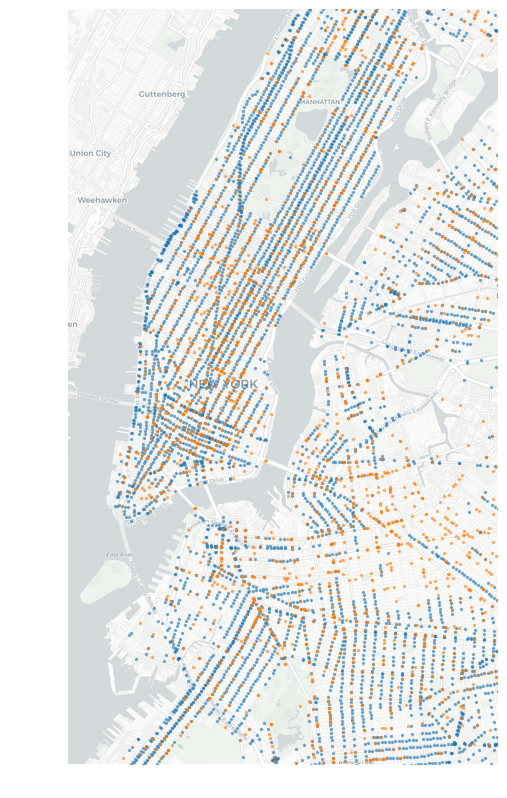

In [72]:
fig, ax = plt.subplots(figsize=(10,10), dpi=100)
extent = tilemapbase.Extent.from_lonlat(-74.03,-73.91, 40.65, 40.81)
ax.set_axis_off()
#ax.yaxis.set_visible(False)


ax.scatter(x_proj, y_proj, alpha = .5, s=2);
ax.scatter(b_x_proj, b_y_proj, alpha = .5, s=2);

plotter = tilemapbase.Plotter(extent, t, width=600)
plotter.plot(ax, t)

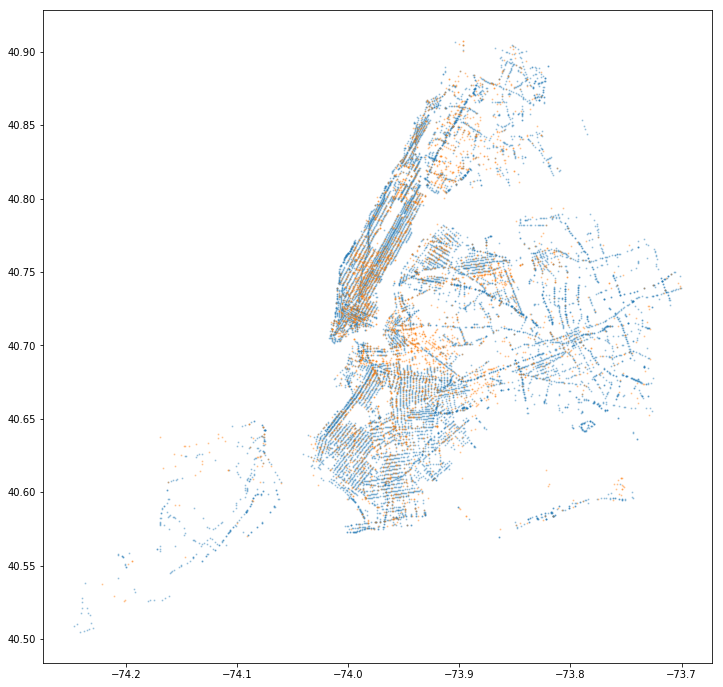

In [79]:
fig = plt.figure(figsize=(12,12))

ax = fig.gca()

ax.scatter(x,y,alpha=.3,s=1)
ax.scatter(b_x,b_y,alpha=.3,s=1)

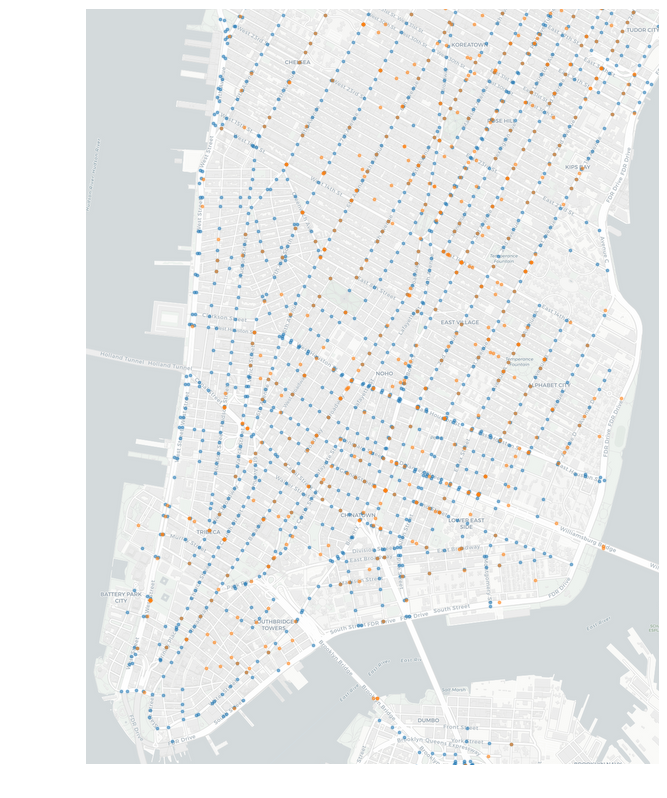

In [68]:
fig, ax = plt.subplots(figsize=(10,10), dpi=100)
extent_man = tilemapbase.Extent.from_lonlat(-74.02,-73.97, 40.7, 40.75)
ax.set_axis_off()
#ax.yaxis.set_visible(False)


ax.scatter(x_proj, y_proj, alpha = .5, s=3);
ax.scatter(b_x_proj, b_y_proj, alpha = .5, s=3);

plotter = tilemapbase.Plotter(extent_man, t, width=600)
plotter.plot(ax, t)



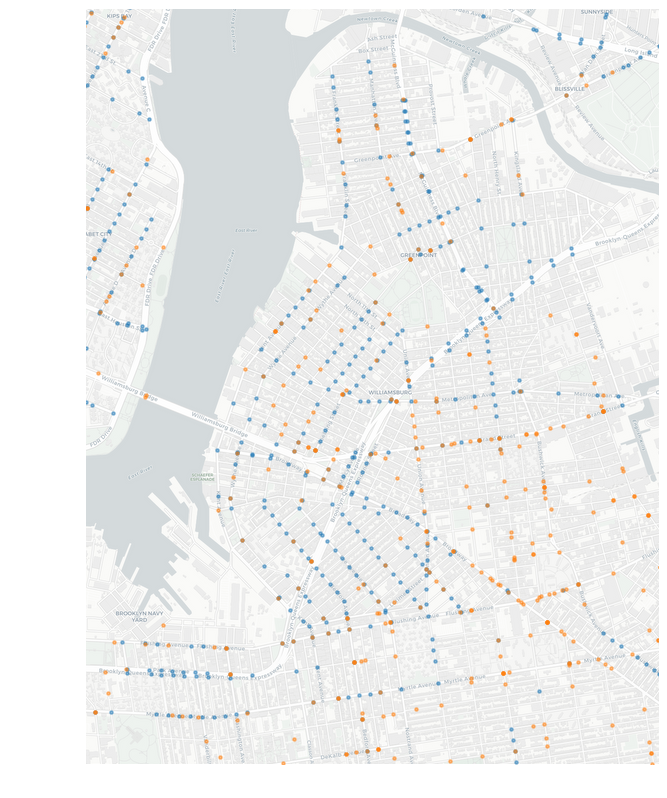

In [77]:
fig, ax = plt.subplots(figsize=(10,10), dpi=100)
extent_br = tilemapbase.Extent.from_lonlat(-73.98,-73.93, 40.69, 40.74)
ax.set_axis_off()
#ax.yaxis.set_visible(False)


ax.scatter(x_proj, y_proj, alpha = .5, s=5);
ax.scatter(b_x_proj, b_y_proj, alpha = .5, s=5);

plotter = tilemapbase.Plotter(extent_br, t, width=600)
plotter.plot(ax, t)


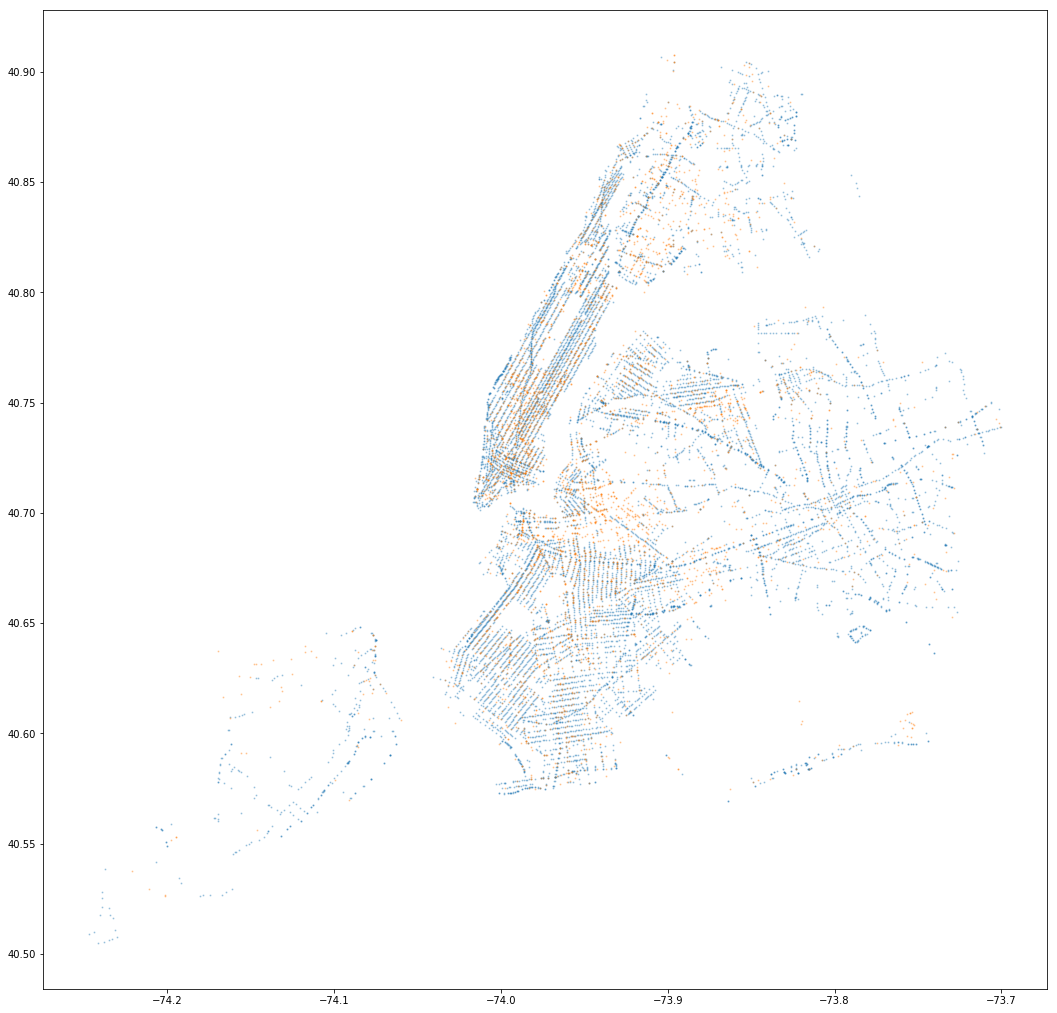

In [78]:
fig = plt.figure(figsize=(18,18))

ax = fig.gca()

ax.scatter(x,y,alpha=.3,s=1)
ax.scatter(b_x,b_y,alpha=.3,s=1)
#ax.scatter(s_x,s_y,alpha=.3,s=1)

In [38]:
from bokeh.embed import json_item
from bokeh.resources import CDN
from bokeh.embed import file_html

In [42]:
p = figure()

p.scatter(x,y,alpha=.5,size=1,color='blue')
p.scatter(b_x,b_y,alpha=.5,size=1,color='red')
#p.scatter(s_x,s_y,alpha=.5,size=1,color='yellow')

#show(p)
file= open('bokeh_street_signals+crashes.html','w')
file.write(file_html(p, CDN, "my plot"))
file.close()

In [23]:
bike_crash_int=bike_crash_2018_df.dropna(subset=['CROSS STREET NAME'])

In [24]:
len(bike_crash_int)

2714

In [25]:
len(bike_crash_2018_df)

4677

In [26]:
bike_crash_int['NUMBER OF CYCLIST INJURED'].sum()

2740

In [27]:
bike_crash_2018_df['NUMBER OF CYCLIST INJURED'].sum()

4719

In [28]:
crash_2018_df[crash_2018_df['NUMBER OF CYCLIST KILLED'] > 0]

NameError: name 'crash_2018_df' is not defined